# Compute performance metrics for the given Y and Y_score without sklearn

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
data = pd.read_csv("C:\\Users\\user\\Desktop\\PerformananceMetrics-master\\5_a.csv") 
data.shape

(10100, 2)

# **Confusion Matrix**

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [0]:

def label(proba):
  if proba>0.5:
    return 1.0
  else:
    return 0.0

data = pd.read_csv("C:\\Users\\user\\Desktop\\PerformananceMetrics-master\\5_a.csv") 
data['Y_Pred'] = data.apply(lambda row:label(row.proba),axis=1)
data.shape

TN=0
FN=0
FP=0
TP=0
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==0:    #actual value=0
    if data.iloc[i][2]==0:
      TN=TN+1
    elif data.iloc[i][2]==1:
      FP=FP+1
  elif data.iloc[i][0]==1:  #actual value=1
    if data.iloc[i][2]==0:
      FN=FN+1
    elif data.iloc[i][2]==1:
      TP=TP+1    
print(TN,FN,FP,TP)

#F1-score:
P=0
N=0
TPR=0
Pr=0
Re=0
F1=0
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==1:
    P=P+1
print(P)
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==0:
    N=N+1
print(N)

TPR=TP/P
Re=TPR
print(TPR)
Pr=(TP/(TP+FP))
print(Pr)
F1=((Pr*Re*2)/(Pr+Re))
print(F1)
    

0 0 100 10000
10000
100
1.0
0.9900990099009901
0.9950248756218906


In [0]:
Y_Unique=data['proba'].unique()
p=np.round(Y_Unique,3)#rounding the threshold values to reduce NUmber of Thresholds
Y_Unique=np.unique(p)
Y_Sorted=sorted(Y_Unique, reverse=True)
print(len(Y_Sorted))

401


# **Threshold**

In [0]:
from tqdm import tqdm
FPR=[]
TPR=[]
def label(proba,Y):
  if proba>Y:
    return 1.0
  else:
    return 0.0
for j in tqdm(range(len(Y_Sorted))):
  j=j
  TP=0
  FP=0
  data['Y_Pred'] = data.apply(lambda row:label(row.proba,Y_Sorted[j]),axis=1)
  print(Y_Sorted[j])
  for i in range(len(data.Y_Pred)):
    if data.iloc[i][0]==0 and data.iloc[i][2]==1:
        FP=FP+1
    elif data.iloc[i][0]==1 and data.iloc[i][2]==1:
        TP=TP+1 
  #print(TP,FP)    
  TPR.append(TP/P)
  FPR.append(FP/N)
print(TPR)
print(FPR)

0.488309
Accuracy: 0.9900990099009901


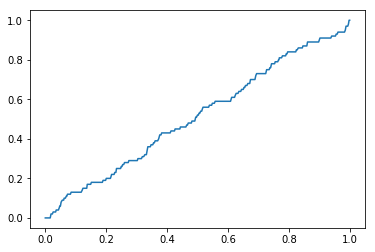

In [0]:
pAUC = np.trapz(TPR,FPR)
print(pAUC)
plt.plot(TPR,FPR)
Accuracy=((TP+TN)/(TP+TN+FP+FN))
print('Accuracy:',Accuracy)

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [0]:

def label(proba):
  if proba>0.5:
    return 1.0
  else:
    return 0.0


data = pd.read_csv("C:\\Users\\user\\Desktop\\PerformananceMetrics-master\\5_b.csv") 
data.shape
data['Y_Pred'] = data.apply(lambda row:label(row.proba),axis=1)
TN=0
FN=0
FP=0
TP=0
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==0:    #actual value=0
    if data.iloc[i][2]==0:
      TN=TN+1
    elif data.iloc[i][2]==1:
      FP=FP+1
  elif data.iloc[i][0]==1:  #actual value=1
    if data.iloc[i][2]==0:
      FN=FN+1
    elif data.iloc[i][2]==1:
      TP=TP+1    
print(TN,FN,FP,TP)

#F1-score:
P=0
N=0
TPR=0
Pr=0
Re=0
F1=0
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==1:
    P=P+1
print(P)
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==0:
    N=N+1
print(N)

TPR=TP/P
Re=TPR
print(TPR)
Pr=(TP/(TP+FP))
print(Pr)
F1=((Pr*Re*2)/(Pr+Re))
print(F1)

Y_Unique=data['proba'].unique()
p=np.round(Y_Unique,3)#rounding the threshold values to reduce NUmber of Thresholds
Y_Unique=np.unique(p)
Y_Sorted=sorted(Y_Unique, reverse=True)
print(len(Y_Sorted))


from tqdm import tqdm
FPR=[]
TPR=[]
def label(proba,Y):
  if proba>Y:
    return 1.0
  else:
    return 0.0
for j in tqdm(range(len(Y_Sorted))):
  j=j
  TP=0
  FP=0
  data['Y_Pred'] = data.apply(lambda row:label(row.proba,Y_Sorted[j]),axis=1)
  print(Y_Sorted[j])
  for i in range(len(data.Y_Pred)):
    if data.iloc[i][0]==0 and data.iloc[i][2]==1:
        FP=FP+1
    elif data.iloc[i][0]==1 and data.iloc[i][2]==1:
        TP=TP+1 
  #print(TP,FP)    
  TPR.append(TP/P)
  FPR.append(FP/N)
print(TPR)
print(FPR)


pAUC = np.trapz(TPR,FPR)
print(pAUC)
plt.plot(TPR,FPR)
Accuracy=((TP+TN)/(TP+TN+FP+FN))
print('Accuracy:',Accuracy)

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{numebr of false positives} + 100 \times \text{numebr of false negatives}$

<pre>
   <b>Note 1:</b> in this data you can see number of positive points < number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [0]:

def label(proba):
  if proba>0.5:
    return 1.0
  else:
    return 0.0

data = pd.read_csv("C:\\Users\\user\\Desktop\\PerformananceMetrics-master\\5_c.csv") 
data.shape
data['Y_Pred'] = data.apply(lambda row:label(row.prob),axis=1)
TN=0
FN=0
FP=0
TP=0
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==0:    #actual value=0
    if data.iloc[i][2]==0:
      TN=TN+1
    elif data.iloc[i][2]==1:
      FP=FP+1
  elif data.iloc[i][0]==1:  #actual value=1
    if data.iloc[i][2]==0:
      FN=FN+1
    elif data.iloc[i][2]==1:
      TP=TP+1    
print(TN,FN,FP,TP)

#F1-score:
P=0
N=0
TPR=0
Pr=0
Re=0
F1=0
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==1:
    P=P+1
print(P)
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==0:
    N=N+1
print(N)

TPR=TP/P
Re=TPR
print(TPR)
Pr=(TP/(TP+FP))
print(Pr)
F1=((Pr*Re*2)/(Pr+Re))
print(F1)

Y_Unique=data['prob'].unique()
p=np.round(Y_Unique,2)#rounding the threshold values to reduce NUmber of Thresholds
Y_Unique=np.unique(p)
Y_Sorted=sorted(Y_Unique, reverse=True)
print(len(Y_Sorted))


from tqdm import tqdm
FPR=[]
TPR=[]
def label(proba,Y):
  if proba>Y:
    return 1.0
  else:
    return 0.0
A_min=0
thres_max=0
for j in tqdm(range(len(Y_Sorted))):
    #j=j*100
    TP=0
    FP=0
    TN=0
    FN=0
    if j==0:
        data['Y_Pred'] = data.apply(lambda row:label(row.prob,Y_Sorted[j]),axis=1)
    #print(Y_Sorted[j])
        for i in range(len(data.Y_Pred)):
            if data.iloc[i][0]==0 and data.iloc[i][2]==1:
                FP=FP+1
            elif data.iloc[i][0]==1 and data.iloc[i][2]==1:
                TP=TP+1 
            elif data.iloc[i][0]==0 and data.iloc[i][2]==0:
                TN=TN+1
            elif data.iloc[i][0]==1 and data.iloc[i][2]==0:
                FN=FN+1
        A_min=((500*FP)+(100*FN))
        thres_max=Y_Sorted[0]
    else:
        data['Y_Pred'] = data.apply(lambda row:label(row.prob,Y_Sorted[j]),axis=1)
        #print(Y_Sorted[j])
        for i in range(len(data.Y_Pred)):
            if data.iloc[i][0]==0 and data.iloc[i][2]==1:
                FP=FP+1
            elif data.iloc[i][0]==1 and data.iloc[i][2]==1:
                    TP=TP+1 
            elif data.iloc[i][0]==0 and data.iloc[i][2]==0:
                TN=TN+1
            elif data.iloc[i][0]==1 and data.iloc[i][2]==0:
                FN=FN+1
        thres=Y_Sorted[j]
        A=((500*FP)+(100*FN))
        #print(FP,FN)
        #print(A)
        if A<A_min:
            A_min=A
            thres_max=thres
            #print('A_min:',A)
            #print(thres_max)




1637 462 168 585
1047
1805
0.5587392550143266
0.7768924302788844
0.65
93



100%|██████████████████████████████████████████████████████████████████████████████████| 93/93 [02:35<00:00,  1.08s/it]


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [0]:
data = pd.read_csv("C:\\Users\\user\\Desktop\\PerformananceMetrics-master\\5_d.csv") 
data.shape

(157200, 2)

In [0]:
#Mean Square Error:
from sklearn.metrics import mean_squared_error as mse
y_mse_scikit=mse(data.y,data.pred)#using scikit
print('y_mse using scikit:',y_mse_scikit)
y_mse_diff=np.subtract(data.y,data.pred)#y-y_pred
y_mse_sqr=np.square(y_mse_diff)#squaring the diff
y_mse_sum=0
for i in range(len(y_mse_sqr)):
    y_mse_sum=y_mse_sum+y_mse_sqr[i]       
y_mse_final=y_mse_sum/len(y_mse_sqr)
print('y_mse calculated:',y_mse_final)

y_mse using scikit: 177.16569974554707
y_mse calculated: 177.16569974554707


In [0]:
#MAPE
y_mape_abs_diff=np.absolute(y_mse_diff)#Absolute difference
y_pred_abs=np.absolute(data.pred)
y_mape_sum=0
y_pred_sum=0
for i in range(len( y_mape_abs_diff)):
    y_mape_sum=y_mape_sum+y_mape_abs_diff[i]   
    y_pred_sum=y_pred_sum+y_pred_abs[i]
y_mape_final=y_mape_sum/y_pred_sum
print('y_mape calculated:',y_mape_final)

y_mape calculated: 0.1292719136626988


In [0]:
#R^2:
y_actual_sum=0
for i in range(len(data.y)):
    y_actual_sum=y_actual_sum+data.y[i] 
y_actual_avg=y_actual_sum/(len(data.y))
print('y_actual_avg:',y_actual_avg)
#SS_TOT:
SS_TOT_diff=np.subtract(data.y,y_actual_avg)#y-y_pred
SS_TOT_SQR=np.square(SS_TOT_diff)#squaring the diff
SS_TOT=0
for i in range(len(SS_TOT_SQR)):
    SS_TOT=SS_TOT+SS_TOT_SQR[i] 
print('SS_TOT:',SS_TOT)
#SS_RES:
SS_RES_diff=np.subtract(data.pred,data.y)#y-y_pred
SS_RES_SQR=np.square(SS_RES_diff)#squaring the diff
SS_RES=0
for i in range(len(SS_RES_SQR)):
    SS_RES=SS_RES+SS_RES_SQR[i] 
print('SS_RES:',SS_RES)
R_SQR=(1-(SS_RES/SS_TOT))
print('R^2 Calculated:',R_SQR)

y_actual_avg: 66.56208651399491
SS_TOT: 638161080.035662
SS_RES: 27850448.0
R^2 Calculated: 0.9563582786990964
